## Setup 

Run the code below in the terminal.

```{bash}
uv sync # sync python packages
uv add --dev ipykernel # install python kernel for jupyter notebook
uv run ipython kernel install --user --env VIRTUAL_ENV $(pwd)/.venv --name=project # create a new kernel for the project
uv run --with jupyter jupyter lab # run jupyter lab
```

Then select the project kernel to run the for the notebook (Sacrifice-Fly-Modeling)

In [2]:
from pybaseball import statcast
import pandas as pd

# Statcast data for ranges of dates
data = statcast(start_dt="2023-08-01", end_dt="2023-08-07")

# Filtering for caught plays like  flyouts, lineouts, popups, and sac flies
caught_plays = data[data['events'].isin(['fly_out', 'lineout', 'popup', 'sac_fly'])]

# relevant columns
caught_coords = caught_plays[['game_date', 'player_name', 'events', 'hc_x', 'hc_y', 'description', 'bb_type']]

# Dropping rows with no coordinates
caught_coords = caught_coords.dropna(subset=['hc_x', 'hc_y'])

#coordinates to numeric
caught_coords['hc_x'] = pd.to_numeric(caught_coords['hc_x'], errors='coerce')
caught_coords['hc_y'] = pd.to_numeric(caught_coords['hc_y'], errors='coerce')
print(caught_coords.head())


This is a large query, it may take a moment to complete


  0%|                                         | 0/7 [00:00<?, ?it/s]/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 14%|████▋                            | 1/7 [00:00<00:03,  1.94it/s]/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/datahelper

      game_date     player_name   events    hc_x    hc_y    description  \
2098 2023-08-07   Okert, Steven  sac_fly  123.57    63.6  hit_into_play   
1555 2023-08-07   Barlow, Scott  sac_fly  139.82   75.97  hit_into_play   
1097 2023-08-07  Gonsolin, Tony  sac_fly   137.7   73.97  hit_into_play   
1061 2023-08-07    Ragans, Cole  sac_fly   58.17  106.89  hit_into_play   
3039 2023-08-07   Kahnle, Tommy  sac_fly  100.42    72.1  hit_into_play   

         bb_type  
2098    fly_ball  
1555    fly_ball  
1097    fly_ball  
1061    fly_ball  
3039  line_drive  


Gathering Player Data


/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/plotting.py:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]
/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/plotting.py:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


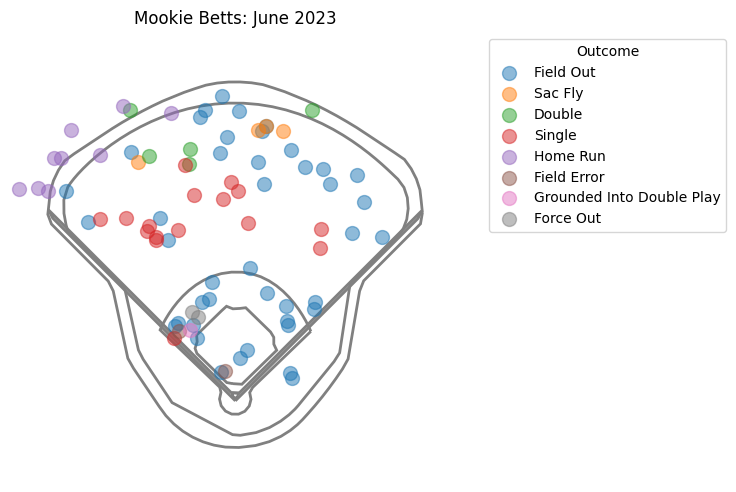

Gathering Player Data


/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/plotting.py:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]
/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/plotting.py:138: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


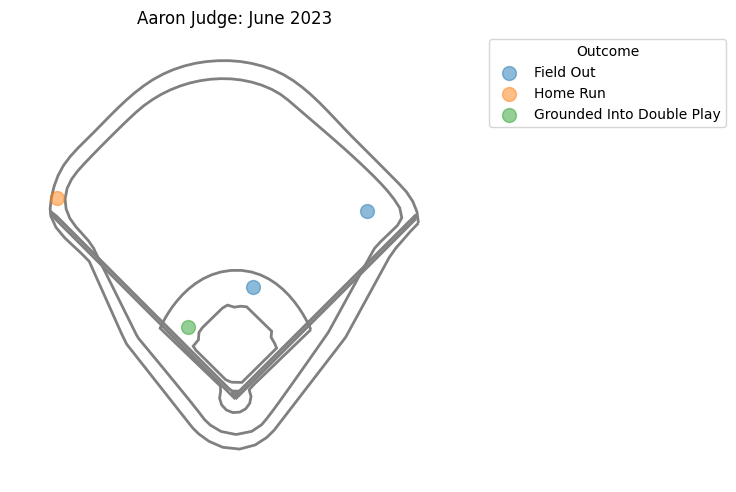

<Axes: title={'center': 'Aaron Judge: June 2023'}>

In [3]:
from pybaseball import statcast_batter, spraychart

# Drawing spray charts for some players like Mookie Betts (Dodgers) and Aaron Judge (Yankees) in june 2023
# the IDs -> Betts = 605141 Judge = 592450

# Betts data
betts_data = statcast_batter('2023-06-01', '2023-07-01', 605141)
spraychart(betts_data, 'dodgers', title='Mookie Betts: June 2023')

# Judge data
judge_data = statcast_batter('2023-06-01', '2023-07-01', 592450)
spraychart(judge_data, 'yankees', title='Aaron Judge: June 2023')




This is a large query, it may take a moment to complete


/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|                                       | 0/184 [00:00<?, ?it/s]/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_

Dodger Stadium sac flies in 2023: 44
Yankee Stadium sac flies in 2023: 37


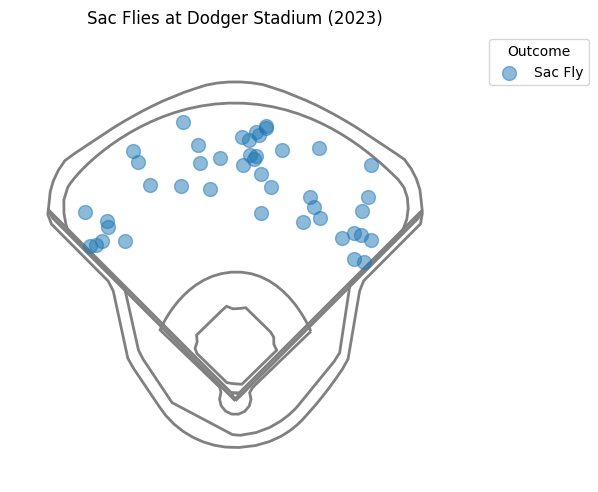

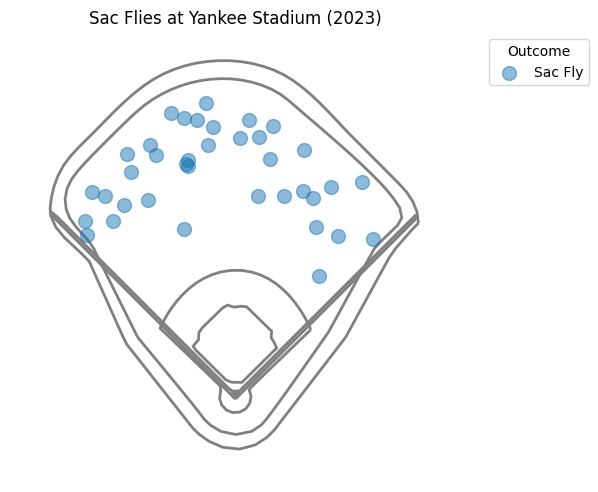

<Axes: title={'center': 'Sac Flies at Yankee Stadium (2023)'}>

In [4]:

# April to October for the regular season
data = statcast(start_dt="2023-04-01", end_dt="2023-10-01")

# Filtering for sac flies
sac_flies = data[data['events'] == 'sac_fly'].copy()

# coordinates
sac_flies['hc_x'] = pd.to_numeric(sac_flies['hc_x'], errors='coerce')
sac_flies['hc_y'] = pd.to_numeric(sac_flies['hc_y'], errors='coerce')
sac_flies = sac_flies.dropna(subset=['hc_x', 'hc_y'])
# Filtering by stadium
dodger_sacs = sac_flies[sac_flies['home_team'] == 'LAD']
yankee_sacs = sac_flies[sac_flies['home_team'] == 'NYY']

# Checking sample sizes and plotting
print("Dodger Stadium sac flies in 2023:", len(dodger_sacs))
print("Yankee Stadium sac flies in 2023:", len(yankee_sacs))
spraychart(dodger_sacs, 'dodgers', title='Sac Flies at Dodger Stadium (2023)')
spraychart(yankee_sacs, 'yankees', title='Sac Flies at Yankee Stadium (2023)')



In [5]:
#obtaining the field zone and batter handedness per stadium

data = statcast(start_dt="2023-04-01", end_dt="2023-10-01")
sac_flies = data[data['events'] == 'sac_fly'].copy()

# coordinates
sac_flies['hc_x'] = pd.to_numeric(sac_flies['hc_x'], errors='coerce')
sac_flies['hc_y'] = pd.to_numeric(sac_flies['hc_y'], errors='coerce')
sac_flies = sac_flies.dropna(subset=['hc_x', 'hc_y'])

# Dodger & Yankee stadiums only
sac_flies = sac_flies[sac_flies['home_team'].isin(['LAD', 'NYY'])]

# Assigning field zones respectively
def get_zone(x):
    if x < 83:
        return 'Left Field'
    elif x < 167:
        return 'Center Field'
    else:
        return 'Right Field'

sac_flies['field_zone'] = sac_flies['hc_x'].apply(get_zone)

# Grouping by stadium (home_team), field zone, and batter handedness
zone_counts_stadium = sac_flies.groupby(['home_team', 'field_zone', 'stand']).size().reset_index(name='count')
zone_counts_stadium = zone_counts_stadium.rename(columns={
    'home_team': 'stadium',
    'stand': 'batter_hand'
})

# Displaying table
print(zone_counts_stadium)


This is a large query, it may take a moment to complete


/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|                                       | 0/184 [00:00<?, ?it/s]/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_

   stadium    field_zone batter_hand  count
0      LAD  Center Field           L      9
1      LAD  Center Field           R     13
2      LAD    Left Field           L      8
3      LAD    Left Field           R      2
4      LAD   Right Field           L      4
5      LAD   Right Field           R      8
6      NYY  Center Field           L      7
7      NYY  Center Field           R     12
8      NYY    Left Field           L      6
9      NYY    Left Field           R      5
10     NYY   Right Field           L      1
11     NYY   Right Field           R      6


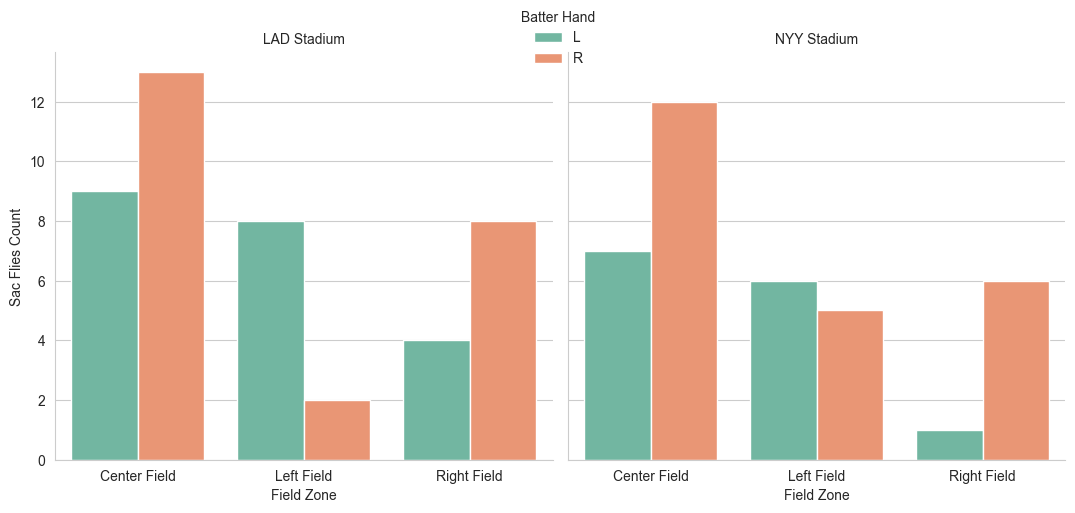

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphing data above
data = pd.DataFrame({
    'stadium': ['LAD']*6 + ['NYY']*6,
    'field_zone': ['Center Field', 'Center Field', 'Left Field', 'Left Field', 'Right Field', 'Right Field']*2,
    'batter_hand': ['L', 'R']*6,
    'count': [9, 13, 8, 2, 4, 8, 7, 12, 6, 5, 1, 6]
})

sns.set_style("whitegrid")
g = sns.catplot(
    data=data,
    kind='bar',
    x='field_zone',
    y='count',
    hue='batter_hand',
    col='stadium',
    palette='Set2',
    height=5,
    aspect=1
)
g.set_axis_labels("Field Zone", "Sac Flies Count")
g.set_titles("{col_name} Stadium")
g._legend.set_title("Batter Hand")
g._legend.set_bbox_to_anchor((0.56, 0.95)) 
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)

plt.tight_layout()
plt.show()


In [8]:
# Plotting sac flies at a given MLB team's home stadium as a function


def plot_sac_flies_by_team(team_nickname: str, home_team_abbr: str, start_dt: str, end_dt: str = "2023-10-01"):
    """
    Plot a spray chart of sacrifice flies hit at a given MLB team's home stadium.

    Args:
        team_nickname (str): Nickname of the team (used for stadium overlay, e.g. 'dodgers', 'yankees')
        home_team_abbr (str): Team's 3-letter abbreviation used in Statcast data (e.g. 'LAD', 'NYY')
        start_dt (str): Start date (format: YYYY-MM-DD)
        end_dt (str, optional): End date (format: YYYY-MM-DD). Defaults to '2023-10-01'.

    Returns:
        None. Displays a spray chart.
    """

    # Load Statcast data
    data = statcast(start_dt=start_dt, end_dt=end_dt)

    # Filter for sac flies
    sac_flies = data[data['events'] == 'sac_fly'].copy()

    # Clean up coordinates
    sac_flies['hc_x'] = pd.to_numeric(sac_flies['hc_x'], errors='coerce')
    sac_flies['hc_y'] = pd.to_numeric(sac_flies['hc_y'], errors='coerce')
    sac_flies = sac_flies.dropna(subset=['hc_x', 'hc_y'])

    # Filter to games played at specified team's home stadium
    team_sac_flies = sac_flies[sac_flies['home_team'] == home_team_abbr]

    # Display spray chart
    print(f"{len(team_sac_flies)} sac flies found at {team_nickname.title()} Stadium.")
    spraychart(team_sac_flies, team_nickname, title=f"Sac Flies at {team_nickname.title()} Stadium ({start_dt[:4]})")


This is a large query, it may take a moment to complete


/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|                                       | 0/184 [00:00<?, ?it/s]/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_

44 sac flies found at Dodgers Stadium.


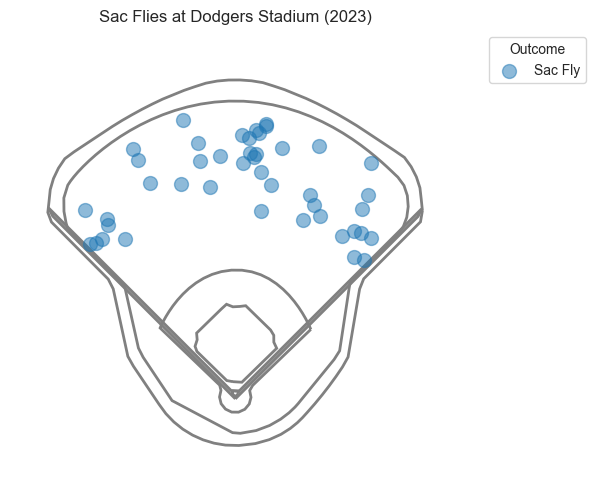

This is a large query, it may take a moment to complete


/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|                                       | 0/184 [00:00<?, ?it/s]/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_

37 sac flies found at Yankees Stadium.


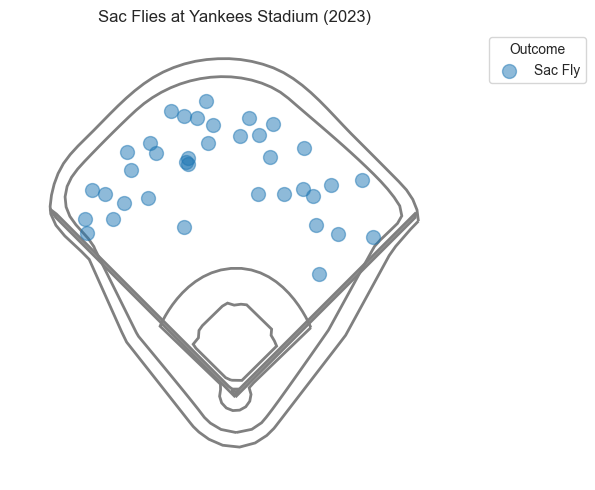

This is a large query, it may take a moment to complete


/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|                                       | 0/184 [00:00<?, ?it/s]/Users/william/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_

0 sac flies found at Giants Stadium.


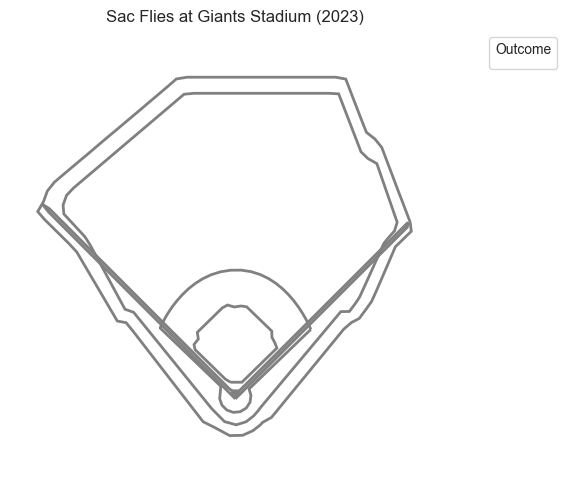

In [9]:
# Example usage 
plot_sac_flies_by_team('dodgers', 'LAD', '2023-04-01')
plot_sac_flies_by_team('yankees', 'NYY', '2023-04-01')
plot_sac_flies_by_team('giants', 'SFN', '2023-04-01')
